In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [3]:
file_path = '../output/idea23/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/idea23_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [4]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [5]:
print(orig)
print(wo_drop)
print(ours)

[10.166, 10.36, 10.278, 10.324, 10.328, 10.336, 10.28, 10.21, 10.362, 10.322, 10.264]
[4.7, 6.478, 8.17, 9.08, 10.12, 10.854, 11.232, 11.52, 11.56, 11.15, 10.264]
[4.7, 4.626, 4.8, 4.898, 5.304, 5.808, 6.392, 7.2, 8.194, 9.156, 10.264]


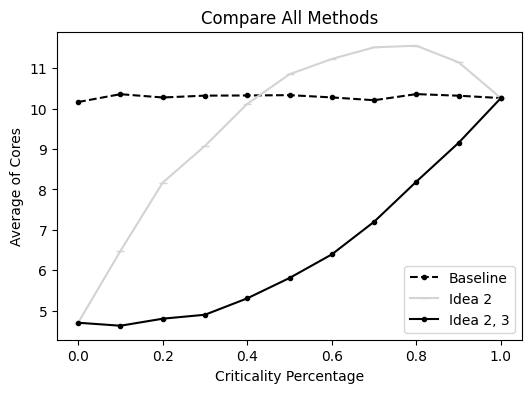

In [7]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(criticality_prob_list, orig, label='Baseline', color='black', linestyle='dashed', marker='.')
plt.plot(criticality_prob_list, wo_drop, label='Idea 2', color='lightgray', marker='_')
plt.plot(criticality_prob_list, ours, label='Idea 2, 3', color='black', marker='.')

plt.title('Compare All Methods')
plt.xlabel('Criticality Percentage')
plt.ylabel('Average of Cores')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.legend()
plt.show()